# Financial Data Analysis - Stocks

In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
'''
Bank of America - BAC
Citigroup - C
Goldman Sachs - GS
JPMorgan Chase - JPM
Morgan Stanley - MS
Wells Fargo - WFC
'''

'\nBank of America - BAC\nCitigroup - C\nGoldman Sachs - GS\nJPMorgan Chase - JPM\nMorgan Stanley - MS\nWells Fargo - WFC\n'

Source - Yahoo Finance

In [3]:
start_date = "2006-01-1"
end_date = "2016-01-1"

In [5]:
BAC = web.DataReader("BAC", 'yahoo',start=start_date,end=end_date)
C = web.DataReader("C", 'yahoo',start=start_date,end=end_date)
GS = web.DataReader("GS", 'yahoo',start=start_date,end=end_date)
JPM = web.DataReader("JPM", 'yahoo',start=start_date,end=end_date)
MS = web.DataReader("MS", 'yahoo',start=start_date,end=end_date)
WFC = web.DataReader("WFC", 'yahoo',start=start_date,end=end_date)

In [6]:
tickers = [BAC,C,GS,JPM,MS,WFC]
tickers1 = ['BAC','C','GS','JPM','MS','WFC']

In [7]:
bank_stocks = pd.concat(tickers,keys=tickers1,axis=1)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.425114  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.059509  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.103382  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.052204  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.074108  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.631054  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.656166  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.756695  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  36.794384  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.183868  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.613142  
2006-01-04   31.799999  31.530001  10870000.0  20.374050  
2006-01-05   31.500000  31.495001  10158000.0  20.351437  
2006-01-06   31.580000  31.680000   8403800.0  20.470978  
2006-01-09   31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

In [10]:
bank_stocks.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers1:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

In [14]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [16]:
import seaborn as sns

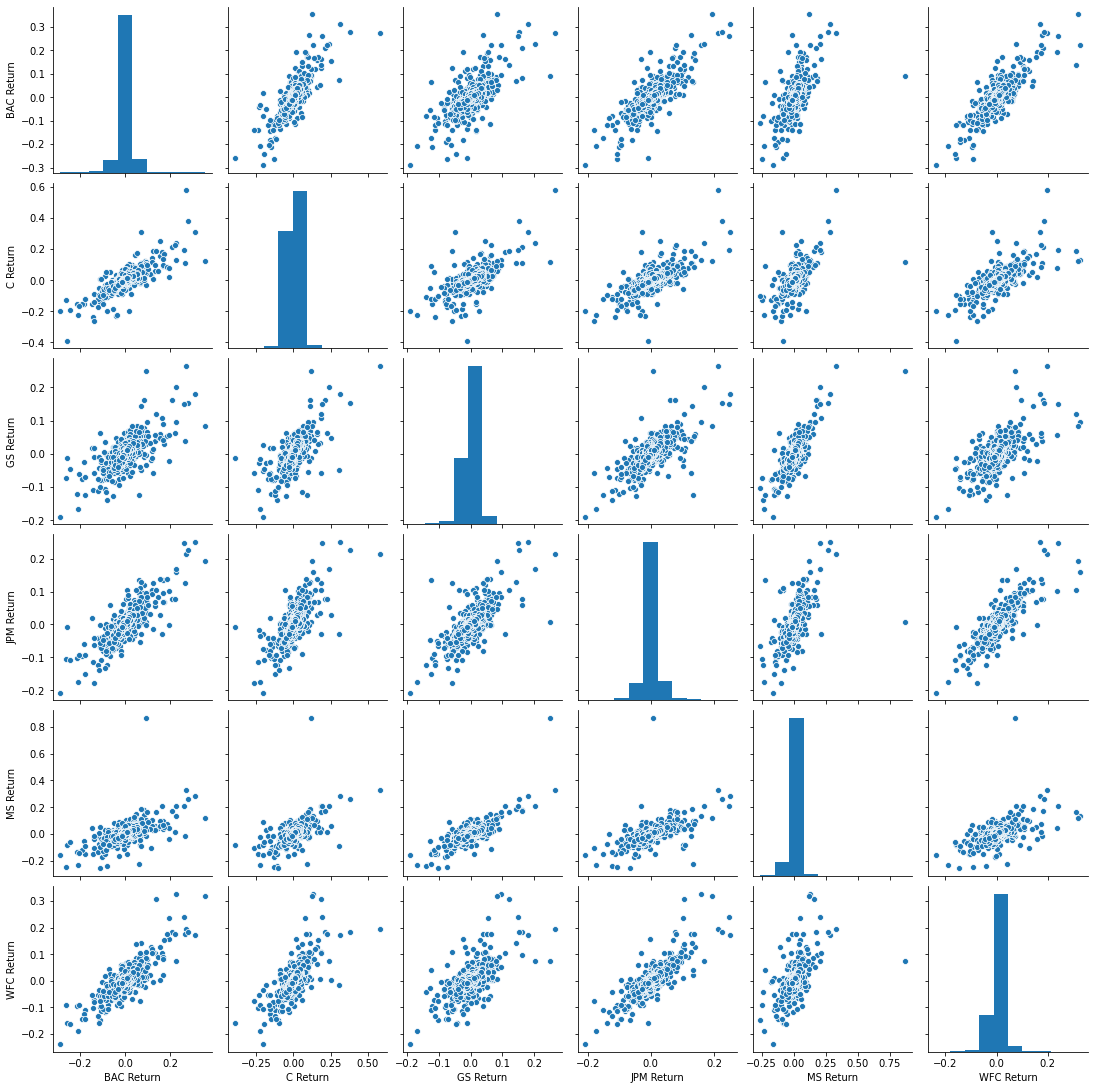

In [17]:
sns.pairplot(returns)

In [24]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [25]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [26]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [29]:
ret = returns.reset_index()

In [36]:
ret

,Date,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...,...
2512,2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2513,2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2514,2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2515,2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


In [46]:
ret1 = ret[ret['Date'].apply(lambda yr:yr.year) == 2015]

In [47]:
ret1.std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

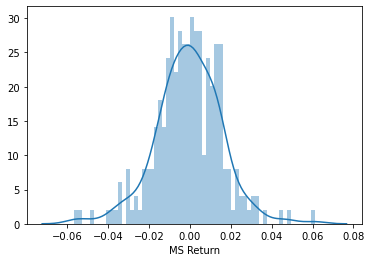

In [53]:
sns.distplot(ret1['MS Return'],bins=60)

In [54]:
ret08 = ret[ret['Date'].apply(lambda yr:yr.year) == 2008]

In [55]:
ret08

,Date,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
502,2008-01-02,-0.016966,-0.017663,-0.034643,-0.033906,-0.040670,-0.036105
503,2008-01-03,-0.006410,0.000346,-0.013295,-0.006877,-0.000196,-0.019931
504,2008-01-04,-0.011166,-0.023851,-0.023970,-0.022684,-0.032195,-0.036115
505,2008-01-07,0.001255,0.000708,-0.026009,0.010017,-0.020081,0.006912
506,2008-01-08,-0.037343,-0.039632,-0.026858,-0.039671,-0.039536,-0.042630
...,...,...,...,...,...,...,...
750,2008-12-24,0.061176,0.039877,0.016489,0.025421,0.004155,0.018155
751,2008-12-26,-0.012565,-0.007375,-0.006149,-0.001675,0.010345,0.001092
752,2008-12-29,-0.031437,-0.023774,0.007766,-0.000671,0.017065,0.011632
753,2008-12-30,0.023184,0.035008,0.071839,0.041303,0.019463,0.034854


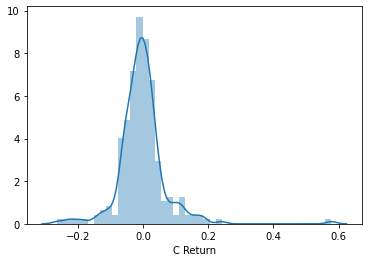

In [56]:
sns.distplot(ret08['C Return'])

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

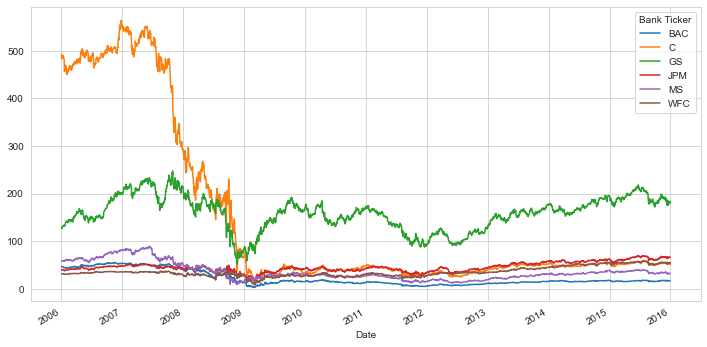

In [59]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,6))

In [60]:
bs = bank_stocks.reset_index()

In [61]:
bs08 = bs[bs['Date'].apply(lambda yr:yr.year) == 2008]

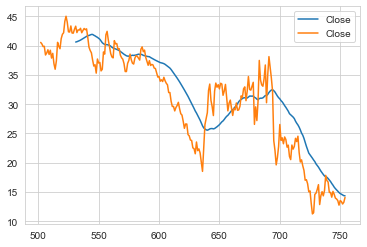

In [70]:
bs08['BAC']['Close'].rolling(window=30).mean().plot()
bs08['BAC']['Close'].plot()
plt.legend()

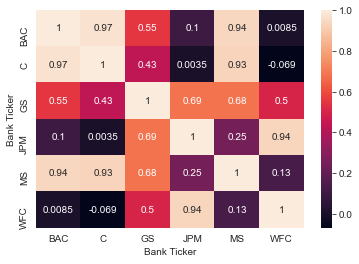

In [71]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

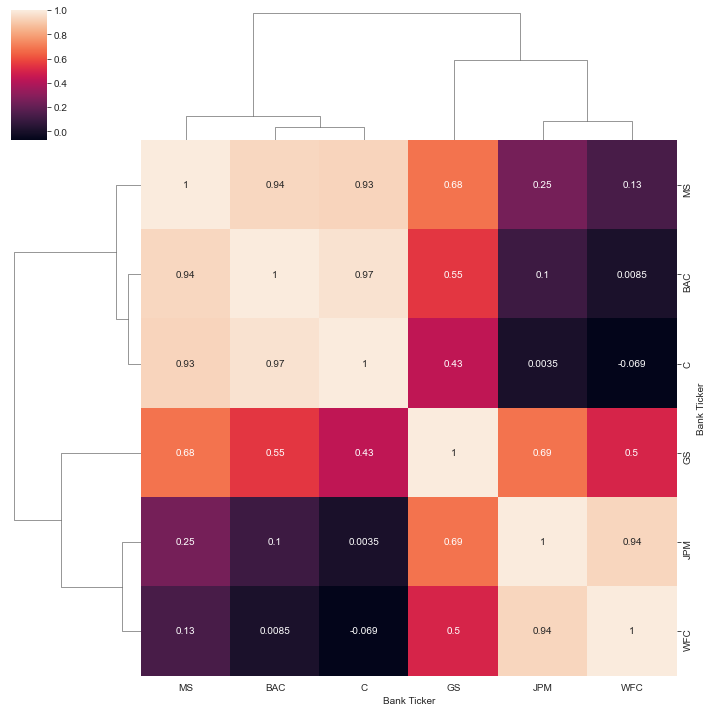

In [72]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)